In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

import tensorflow as tf
import numpy as np
import os
import shutil
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

2023-09-05 22:08:14.438787: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-05 22:08:14.585459: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-09-05 22:08:15.250504: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-09-05 22:08:15.250694: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [4]:
data_sheets = [
                # 'A1_no_negatives.xlsx',
                # 'A1.xlsx',
                # 'A2.xlsx',\
                # 'A3.xlsx',\
                'A4.xlsx'
               ]

options = [
            # 'Main Data',\
            # 'A2',\
           # 'A3',\
           'A4'
          ]

In [8]:
pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 3.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [10]:
file_path = '../../../raw_data/timeseries_data/'
print('Loading data...please wait')
df = pd.read_excel(file_path+"A4.xlsx",
                    dtype={'a': np.float64, 'b': np.int32})

print('------------------------------------------------------------------')

Loading data...please wait
------------------------------------------------------------------


In [11]:
df['date'] +=  pd.to_timedelta(df.hour, unit='h')
df = df.sort_values(by=['date'])

In [13]:
data = df
data = data.filter(items = ['date', 'Energy (kWh)'])

In [14]:
data = data.rename(columns={ "Energy (kWh)": "energy"})
data = data.set_index('date')

y = data['energy']
y = y.resample('MS').mean()

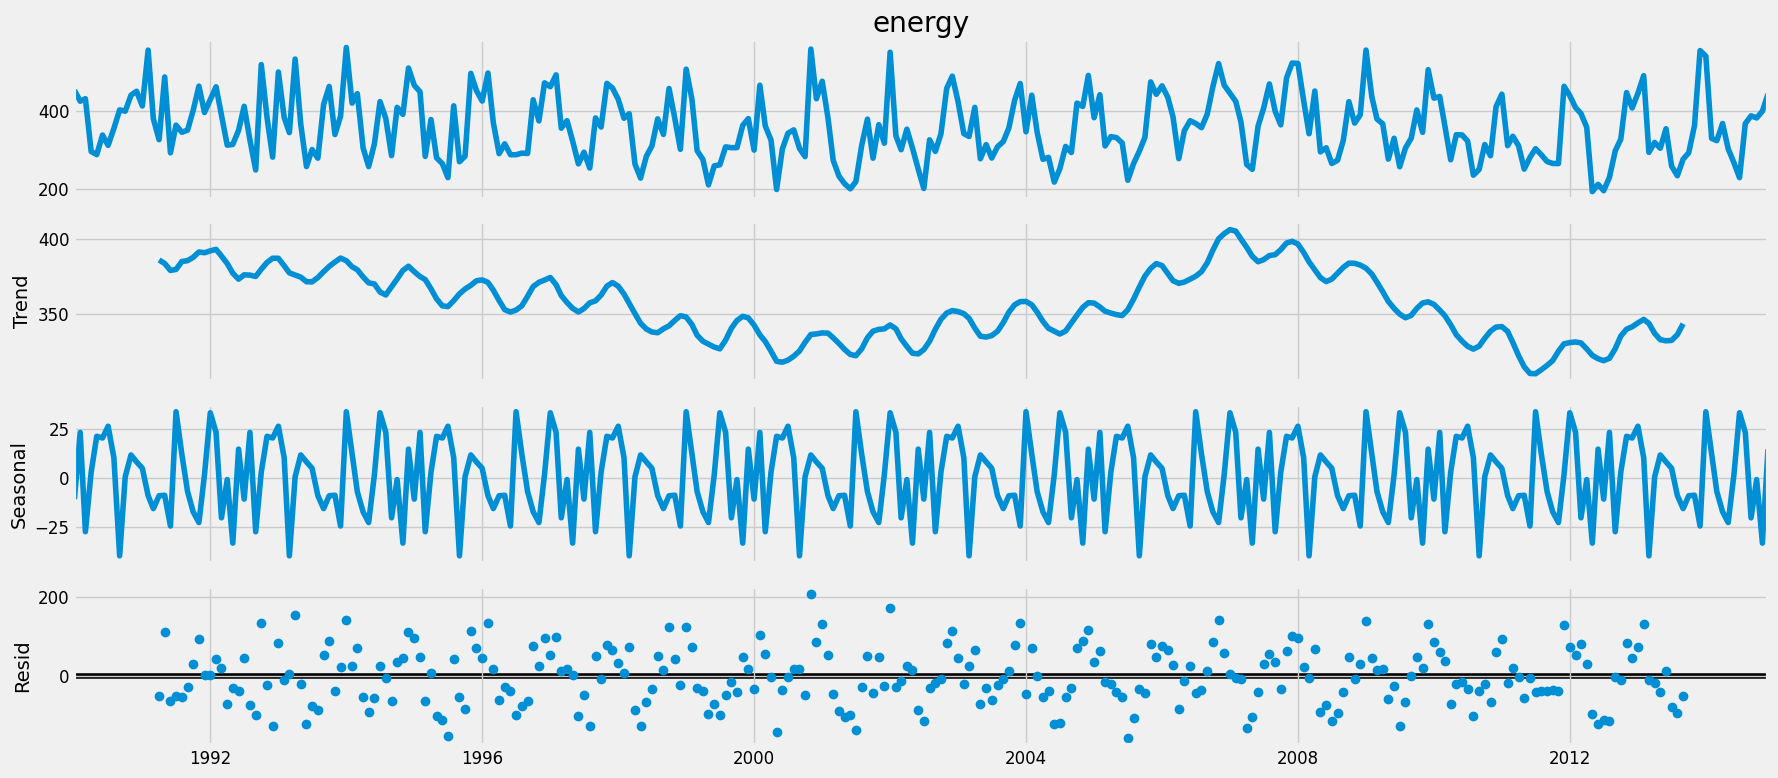

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive', period = 30)
fig = decomposition.plot()
plt.show()

In [17]:
#%% Fit an ARIMA
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [18]:
warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(endog=train.Rides,\
                                            trend='n',\
                                            order=(1,0,1),\
                                            seasonal_order=(1,0,1,12))

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [19]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.47606D+00    |proj g|=  3.94283D-01

At iterate    5    f=  5.36370D+00    |proj g|=  4.70559D-01

At iterate   10    f=  5.36200D+00    |proj g|=  9.34274D-03

At iterate   15    f=  5.35925D+00    |proj g|=  5.29566D-02


 This problem is unconstrained.



At iterate   20    f=  5.35650D+00    |proj g|=  8.64332D-03

At iterate   25    f=  5.35467D+00    |proj g|=  6.74161D-02

At iterate   30    f=  5.30190D+00    |proj g|=  3.30940D-01

At iterate   35    f=  5.30137D+00    |proj g|=  1.53208D-03

At iterate   40    f=  5.30134D+00    |proj g|=  5.26030D-02

At iterate   45    f=  5.30134D+00    |proj g|=  8.05919D-04

At iterate   50    f=  5.30134D+00    |proj g|=  2.73103D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     67      1     0     0   2.731D-05   5.301D+00
  F =   5.3013359800186937     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

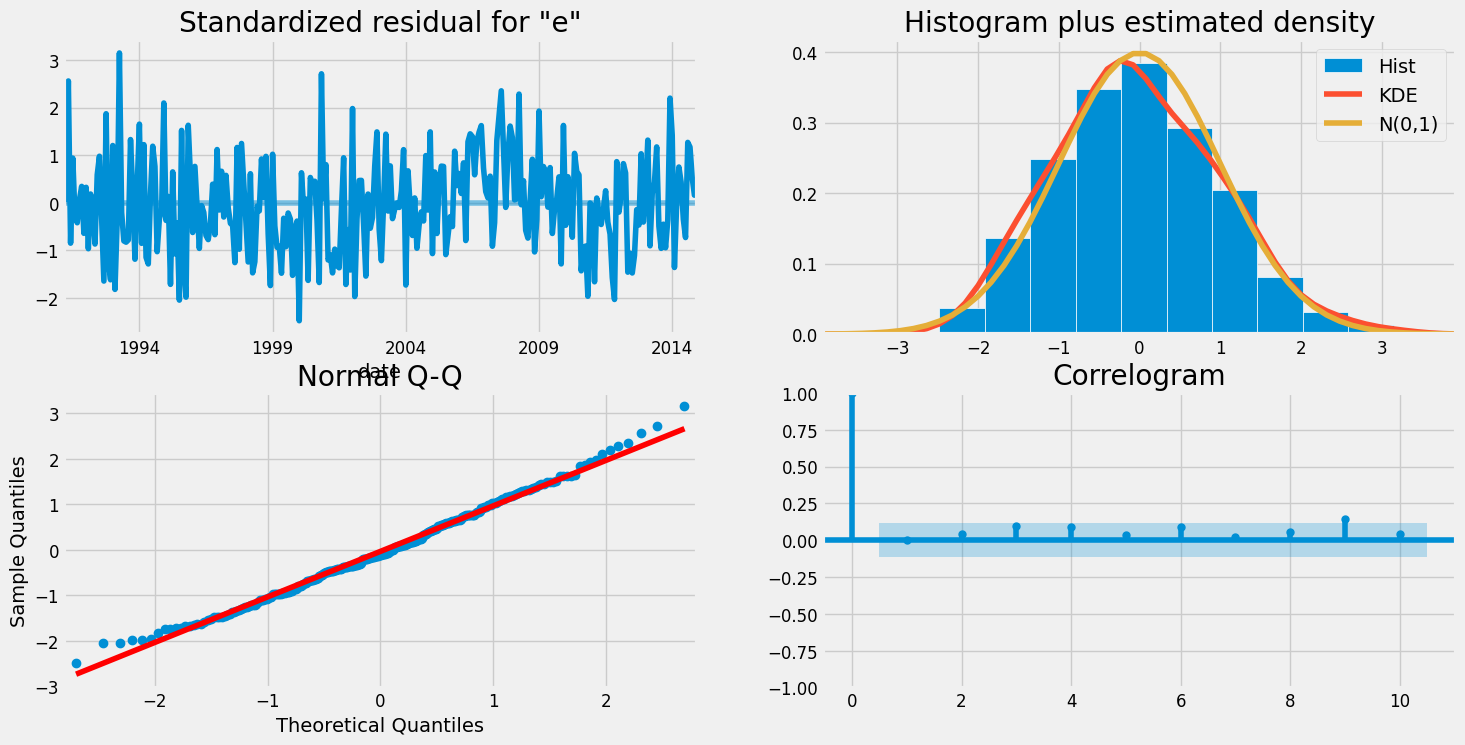

In [20]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

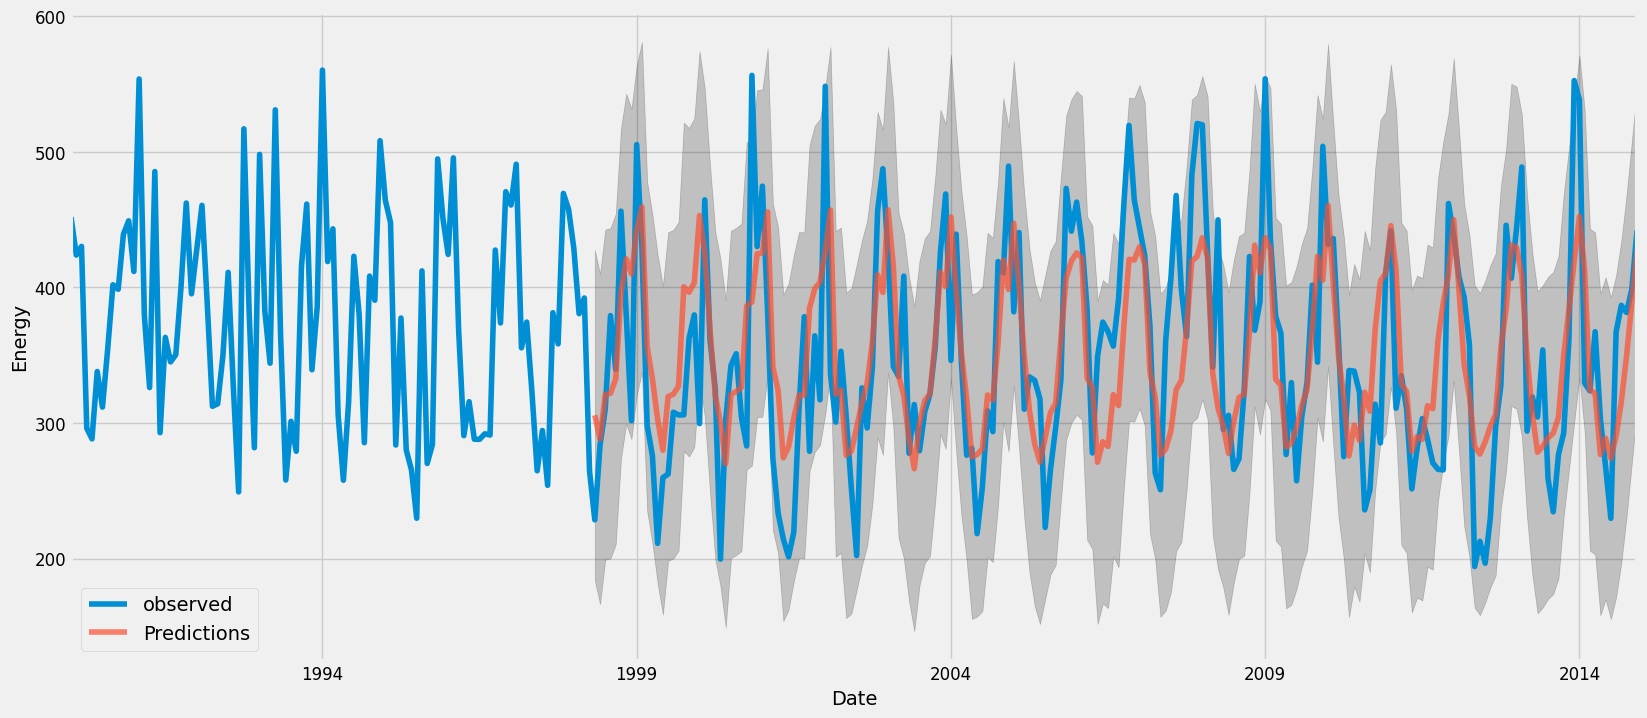

In [22]:
#%% Validating Forecast
start_forecast = 100
pred = results.get_prediction(start=start_forecast, dynamic=False)
pred_ci = pred.conf_int()

ax = y.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Predictions', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Energy')
plt.legend()

plt.show()

In [23]:
y_forecasted = pred.predicted_mean
y_truth = y[100:]

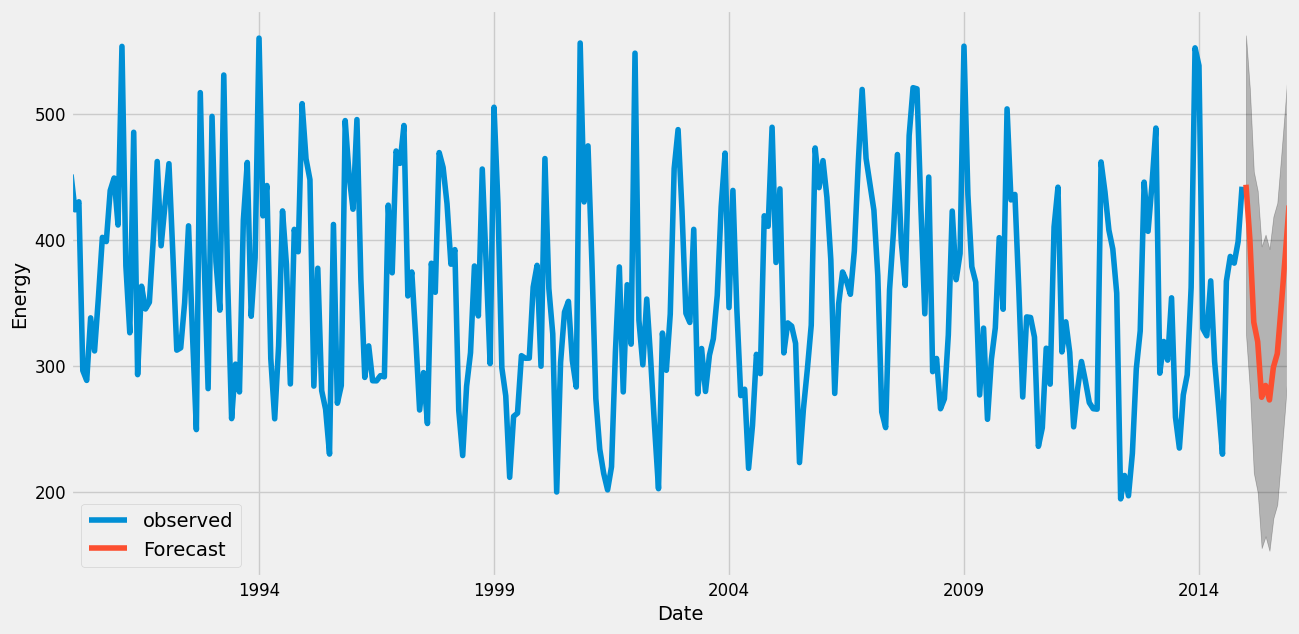

In [24]:
#%% Forecast 1y
years = 1
pred_uc = results.get_forecast(steps=12*years)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Energy')
plt.legend()
plt.show()

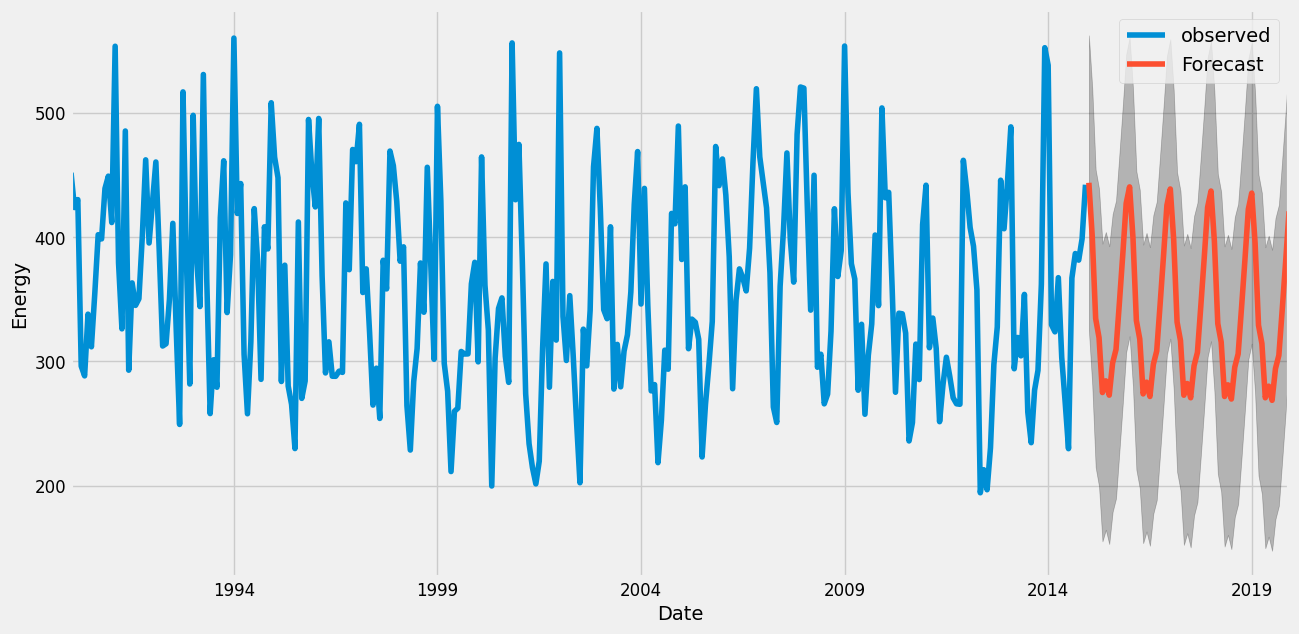

In [25]:
#%% Forecast 5y
years = 5
pred_uc = results.get_forecast(steps=12*years)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Energy')
plt.legend()
plt.show()